<a href="https://colab.research.google.com/github/Cours-EDUlib/FAS-ISDS/blob/restructuration-finale/module-6/Applications/6-4_syntaxe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Les statistiques et la science des données appliquées
##Application 4: régression logistique simple avec VI catégorielle
###Syntaxe de l'exemple présenté

In [ ]:
#Téléchargement des packages nécessaires
library (tidyverse)
install.packages("rsq")
require(rsq)
library(ggplot2)
install.packages("descr")
require(descr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’


Loading required package: rsq

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’


Loading required package: descr



In [ ]:
path_to_csv = 'https://github.com/Cours-EDUlib/FAS-ISDS/blob/main/module-7/Applications/7-4_donnees.csv?raw=true' #Téléchargement de la base de données depuis github

bd <- read_csv(path_to_csv) #Enregistrement de la base de données dans l'ojet "bd"
bd #Lecture des données


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  FEPRES = col_double(),
  femme = col_double(),
  marital = col_double(),
  sei = col_double(),
  degree = col_double(),
  partner = col_double()
)




ID,FEPRES,femme,marital,sei,degree,partner
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,43.4,1,12
2,1,0,0,38.9,3,17
3,1,0,1,35.1,4,18
4,1,1,1,62.5,0,6
5,1,1,1,17.1,0,8
6,1,1,1,69.2,3,17
7,1,0,1,29.8,1,12
8,1,1,0,37.7,1,13
9,1,1,1,37.7,1,13


Voici les variables à l'étude dans cet exemple:
- FEPRES: accord de l'individu à voter pour une femme candidate à la présidence (USA) (0 = non, 1 = oui)
- femme: genre de l'individu ( 0 = homme, 1 = femme)
- sei: statut socioéconomqiue (score de 0 à 100)

Nous allons d'abord examiner la relation entre la variable FEPRES et femme.

Commençons par produire quelques statistiques descriptives de base (fréquences) pour se familiariser avec les variables à l'étude.

,Frequency,Percent
0,189,6.508264
1,2715,93.491736
Total,2904,100.000000


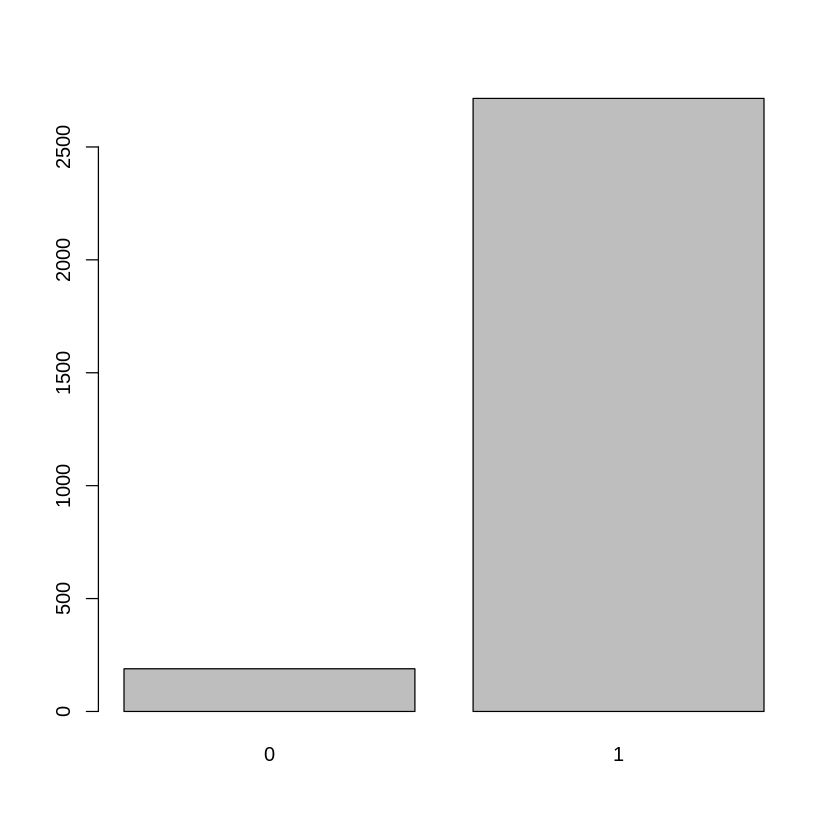

,Frequency,Percent
0,1285,44.24931
1,1619,55.75069
Total,2904,100.00000


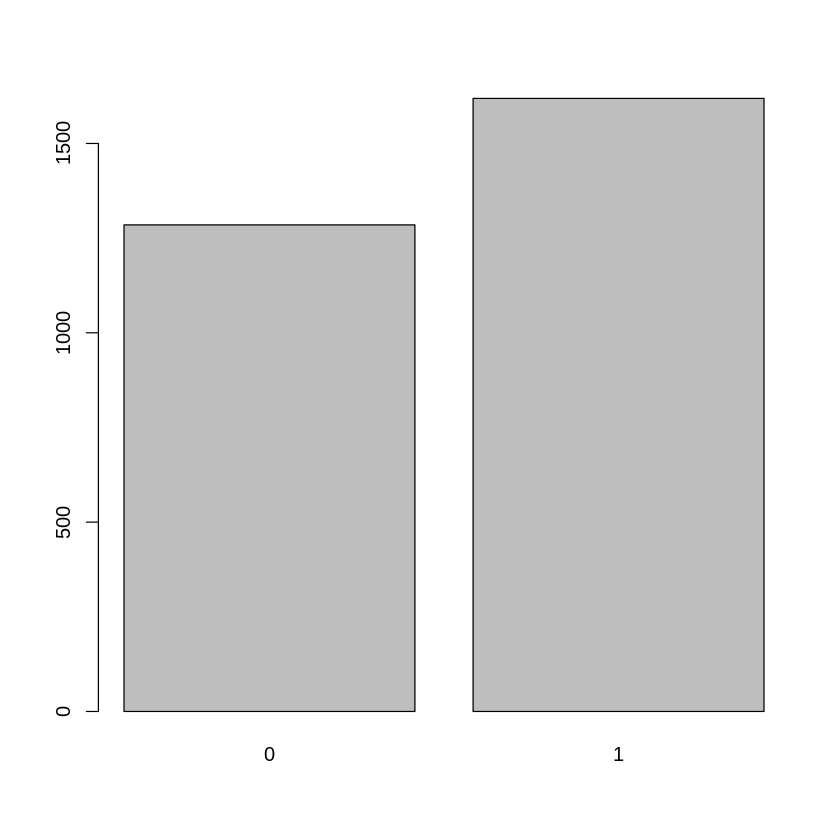

In [ ]:
#Fréquences et distribution VI régions

freq(bd$FEPRES)
freq(bd$femme)

Interprétation:

Le tableau de fréquence, accompagné d’un graphique à barres par défaut, nous montre qu’une très forte majorité de l’échantillon, 93,5% pour être exact, s’est prononcé en accord avec le fait de voter pour une femme à la présidence. On peut aussi observer que l’échantillon est assez bien divisé entre hommes et femmes, même si on a un peu plus de femmes (55% de l’échantillon).

In [ ]:
reglog <- glm(FEPRES ~ femme, data = bd, family="binomial")
summary(rstandard(reglog))
summary(reglog)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.4141  0.3344  0.3344  0.1897  0.4048  0.4048 


Call:
glm(formula = FEPRES ~ femme, family = "binomial", data = bd)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4134   0.3343   0.3343   0.4046   0.4046  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.4615     0.1037  23.746  < 2e-16 ***
femme         0.3948     0.1509   2.617  0.00887 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1398.2  on 2903  degrees of freedom
Residual deviance: 1391.3  on 2902  degrees of freedom
AIC: 1395.3

Number of Fisher Scoring iterations: 5


Interprétation:

Il n’y a pas de données extrêmes, puisque les résidus sont inclus dans l’intervalle de 3 écart-types au-dessus et au-dessous de la moyenne.

La constante ou intercept est à 2,5 et le coefficient non standardisé pour la variable femme est de 0,39 et les deux sont significatifs au seuil de 0,001.

Rappel des équations en lien avec la régression logistique :

- Calcul de probabilité : $ prob(evenement) = \frac {1} {1 + e^{-(B0+B1(X))}} $

- Calcul de la cote :  $ \frac {prob(evenement)} {prob(non-evenement)} $




Commençons par la probabilité. Dans l’équation, on remplace le B0 par le coefficient de la ligne « intercept », et le B1 par le coefficient de la VI femme.

Probabilité d'être en accord avec le fait de voter pour une femme à la présidence si X=1 (femme) : 0,945

Probabilité d'être en accord avec le fait de voter pour une femme à la présidence si X=0 (homme) : 0,921

Cote si X=1 (femme): 17,18

Cote si X=0 (homme): 11,65

Rapport de cote: 17,18/11,65 = 1,47

La probabilité qu’une femme soit d’accord avec le fait de voter pour une femme à la présidence est de 94,5%. la probabilité qu’un homme soit d’accord avec le fait de voter pour une femme à la présidence est de 92,1%, 2 points de pourcentage de moins que pour les femmes. En fonction du rapport de cotes, les femmes ont 1,47 fois plus de chances d’être en accord avec le fait de voter pour femme à la présidence que les hommes.

Nous allons maintenant examiner la relation entre la variable FEPRES et sei.

Commençons par produire quelques statistiques descriptives de base pour se familiariser avec la VI:
  - La moyenne
  - La médiane
  - Le minimum
  - Le maximum
  - l'écart-type

In [ ]:
#Statistiques descriptives

summary(bd$sei)
sd(bd$sei, na.rm=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  17.10   32.30   38.90   47.85   63.50   97.20     123 

[1] 18.99283

Warning message:
“Removed 123 rows containing non-finite values (stat_bin).”


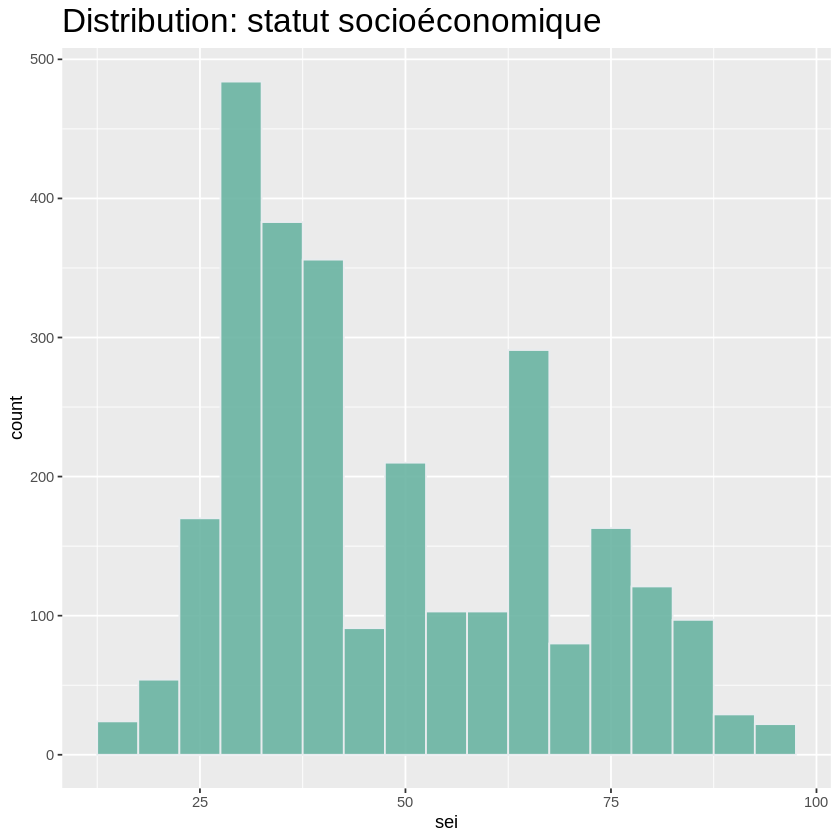

In [ ]:
#Histogramme
ggplot(bd, aes(x=sei)) +
  geom_histogram(binwidth=5, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: statut socioéconomique") +
    theme(
      plot.title = element_text(size=20)
    )

Interprétation:

Notons la présence de 123 données manquantes. Le statut socioéconomique varie de 17,10 à 97,20, avec une moyenne de 47,85 et un écart-type de 18,99. L’histogramme montre une certaine asymétrie dans la distribution, mais on peut quand même réaliser la régression logistique.

In [ ]:
reglog2 <- glm(FEPRES ~ sei, data = bd, family="binomial")
summary(rstandard(reglog2))
summary(reglog2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.5455  0.3285  0.3708  0.1894  0.3930  0.4289 


Call:
glm(formula = FEPRES ~ sei, family = "binomial", data = bd)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5431   0.3283   0.3707   0.3928   0.4285  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 2.148092   0.208142  10.320  < 2e-16 ***
sei         0.011327   0.004345   2.607  0.00914 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1333.6  on 2780  degrees of freedom
Residual deviance: 1326.5  on 2779  degrees of freedom
  (123 observations deleted due to missingness)
AIC: 1330.5

Number of Fisher Scoring iterations: 5


Interprétation:

On confirme qu’il n’y a pas de données extrêmes grâce au résidus standard. La constante ou intercept est à 2,14 et le coefficient non standardisé pour la variable sei est de 0,011, tous deux significatifs au seuil de 0,001.

Probabilité d'être en accord avec le fait de voter pour une femme à la présidence si X=47: 0,943

Probabilité d'être en accord avec le fait de voter pour une femme à la présidence si X=90: 0,958

Cote si X=47: 16,5

Cote si X=90: 22,8

Rapport de cote: 22,8/16,5 = 1,39

Les individus au statut socioéconomique de 90 ont 1,39 plus de chance d’être en accord de voter pour une femme à la présidence que la moyenne des Américains. 

###Bonus

Représentation visuelle des probabilités prédites

In [ ]:
#Nouvelle base de données sans les données manquantes
bd2 <- bd[!is.na(bd$sei),]
bd2

ID,FEPRES,femme,marital,sei,degree,partner
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,43.4,1,12
2,1,0,0,38.9,3,17
3,1,0,1,35.1,4,18
4,1,1,1,62.5,0,6
5,1,1,1,17.1,0,8
6,1,1,1,69.2,3,17
7,1,0,1,29.8,1,12
8,1,1,0,37.7,1,13
9,1,1,1,37.7,1,13


In [ ]:
#Calcul des probabilités prédites
bd2$pred2 <- predict(reglog2, type="response")
summary(bd2$pred2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9123  0.9251  0.9301  0.9353  0.9462  0.9626 

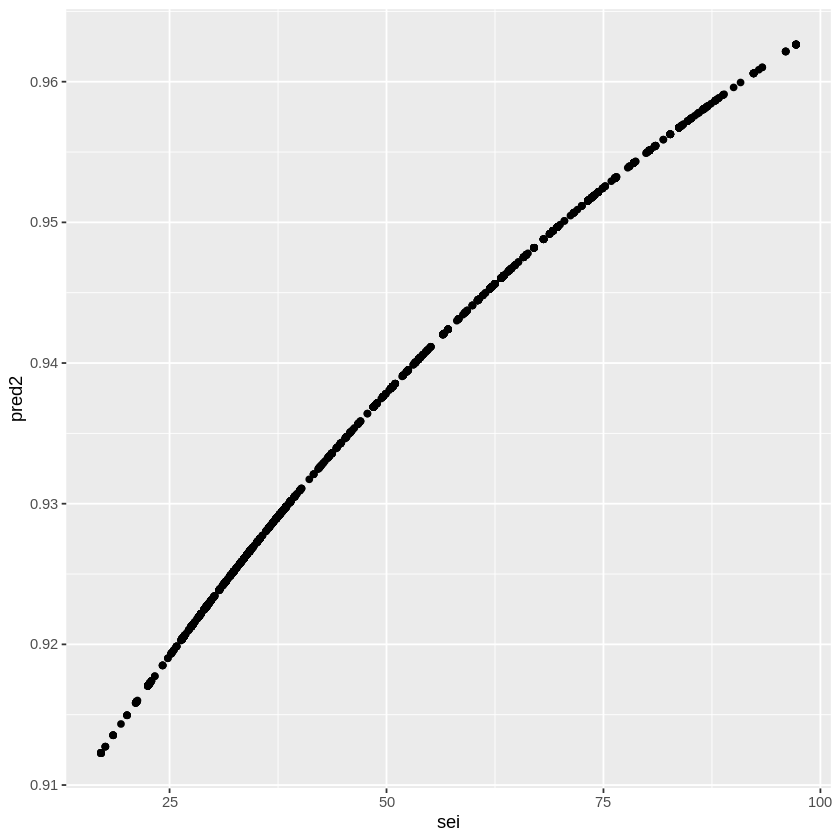

In [ ]:
#Nuage de points
ggplot(bd2, aes(x=sei, y=pred2)) + 
    geom_point()